In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
adata = sc.read('../../../pipeline/data/multigrate_mil_reg/pbmc_healthy_covid_3cond_mtg_embed_ord_reg/959918ced7_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 362426 × 16
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'Status_on_day_collection_summary_cont', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn'
    obsm: 'X_umap', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'

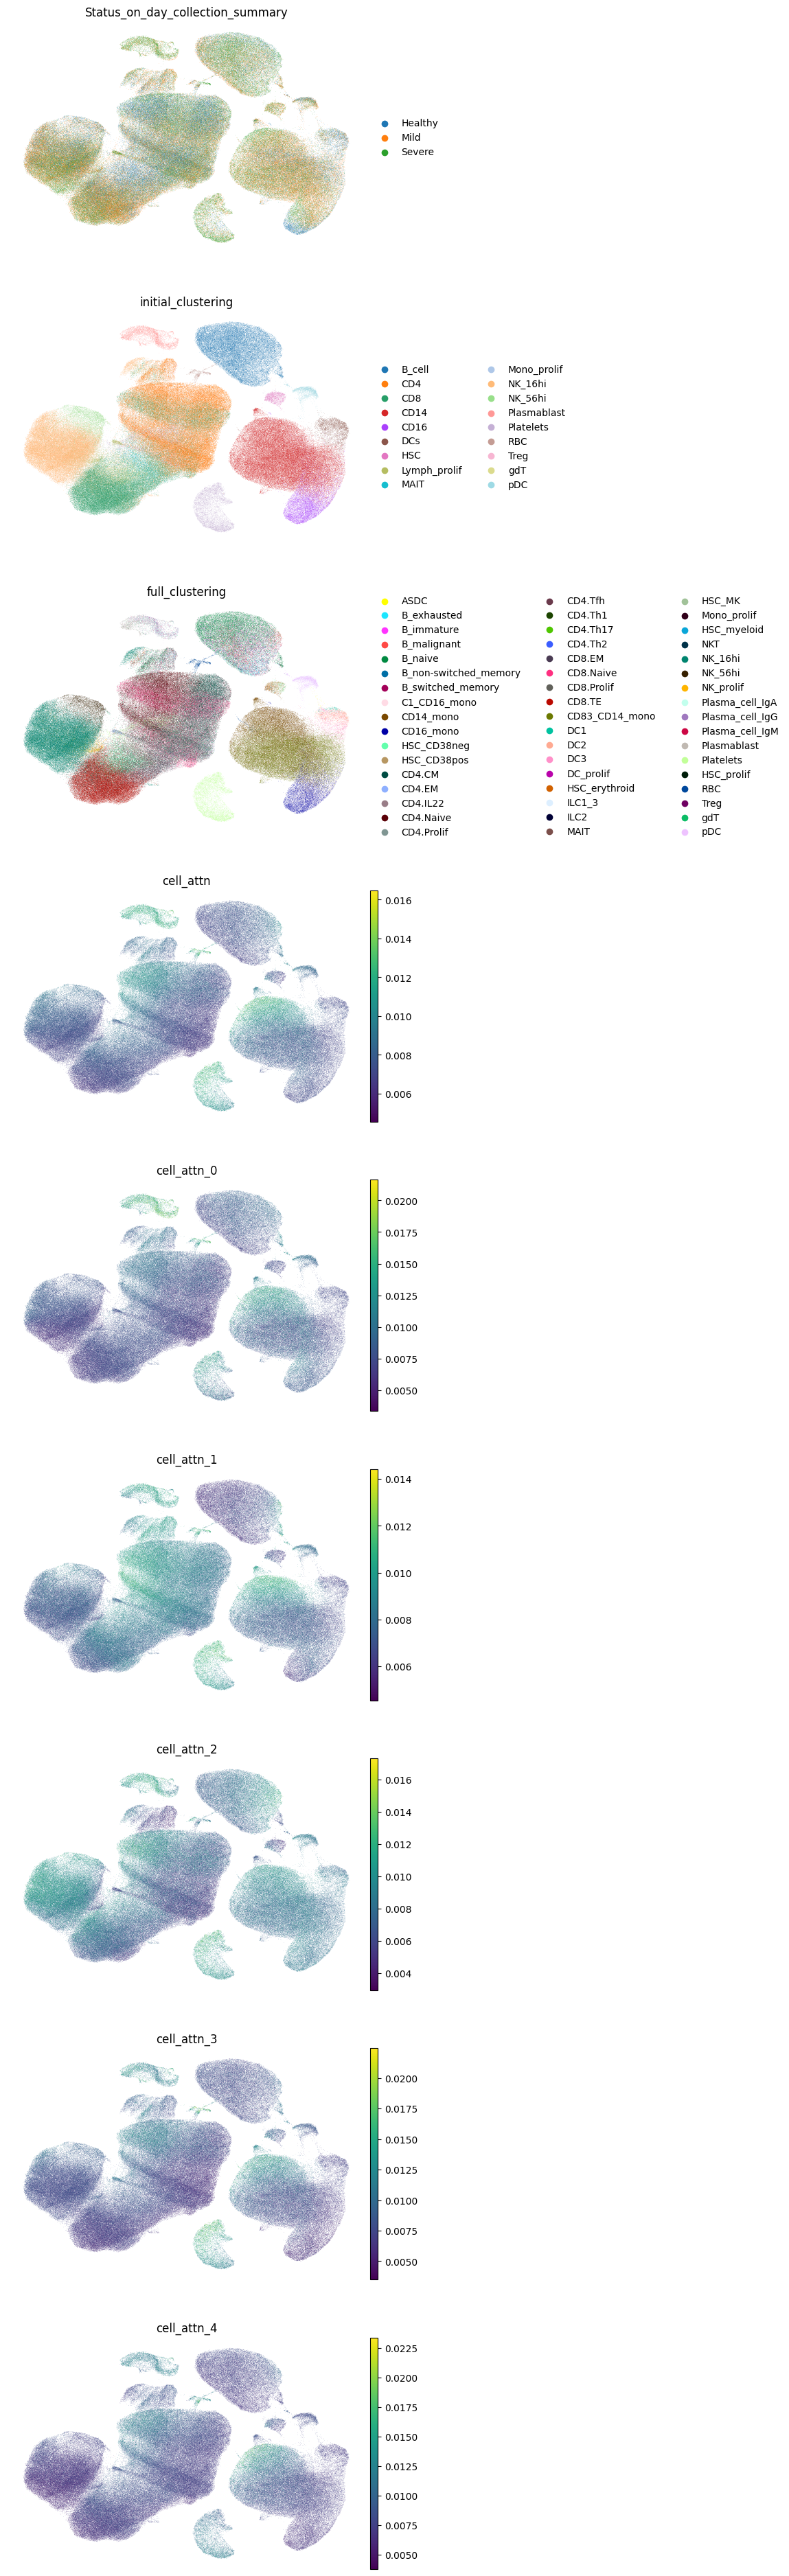

In [4]:
sc.pl.umap(
    adata,
    color=['Status_on_day_collection_summary', 'initial_clustering', 'full_clustering',
           'cell_attn', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4'],
    ncols=1,
    frameon=False
)

-------- Healthy -------


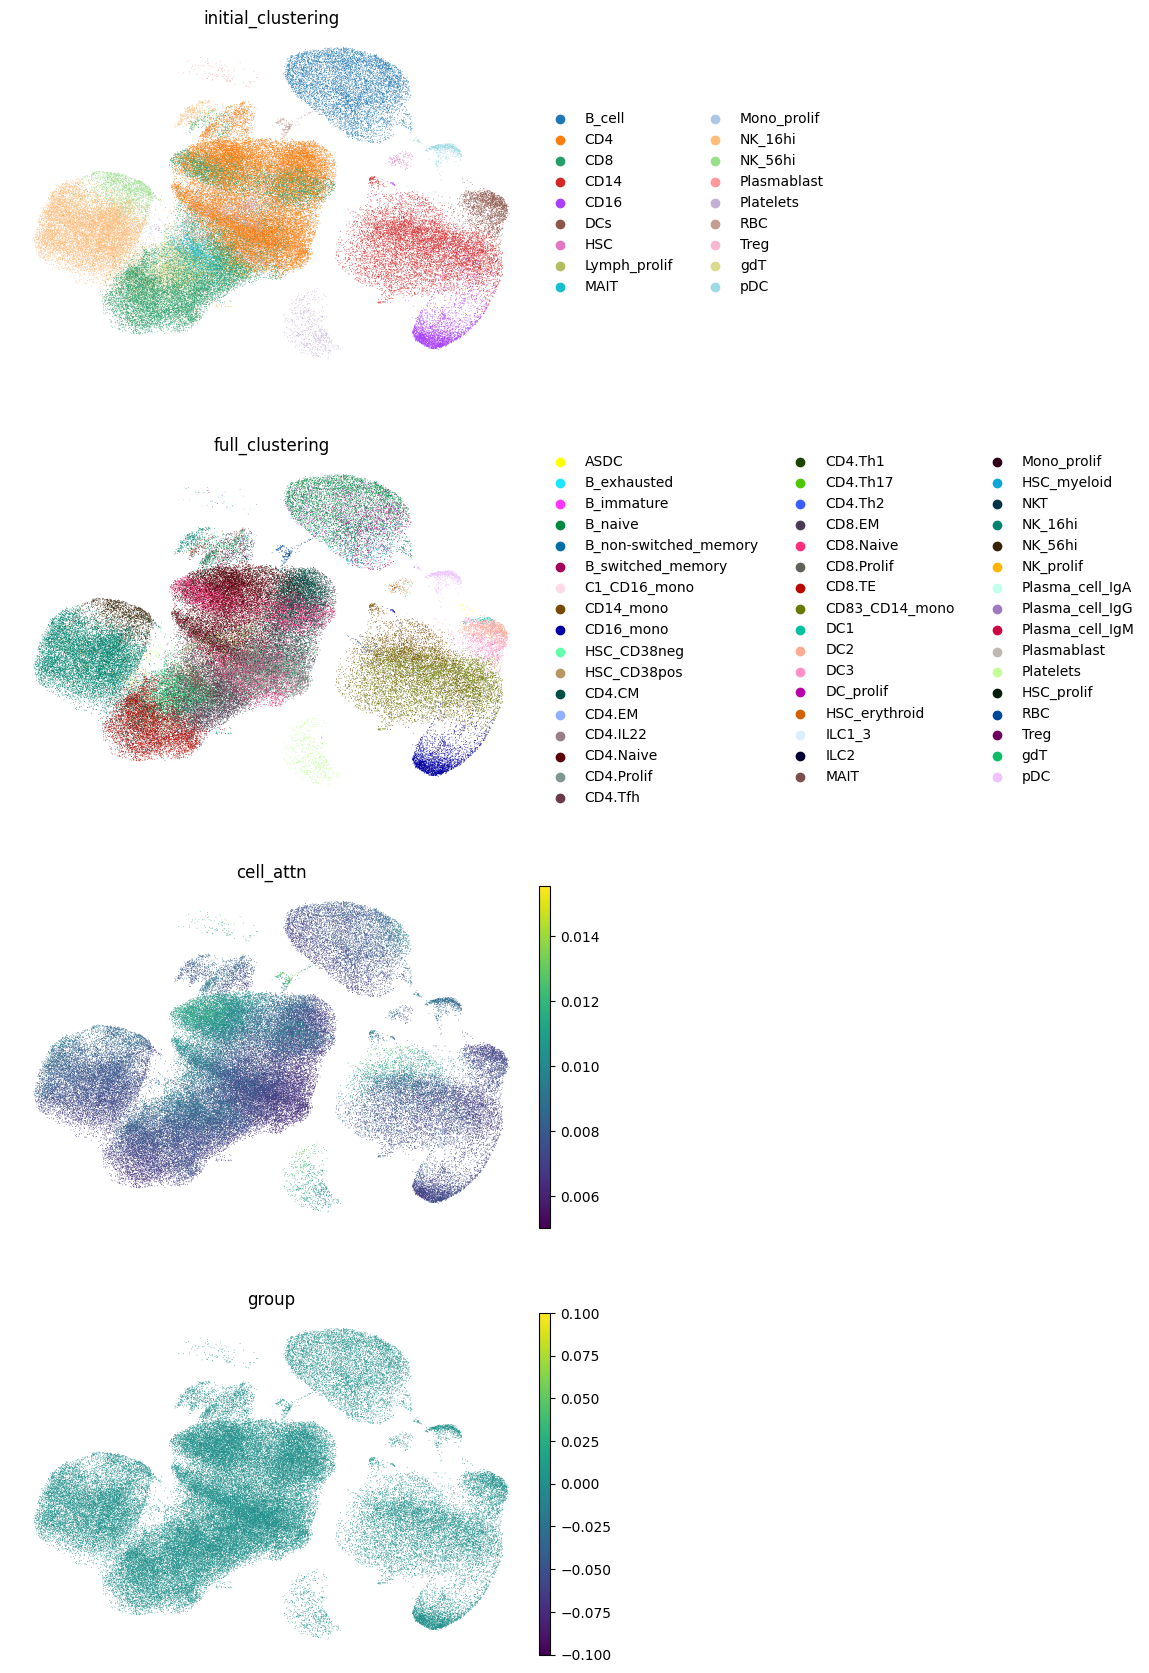

-------- Mild -------


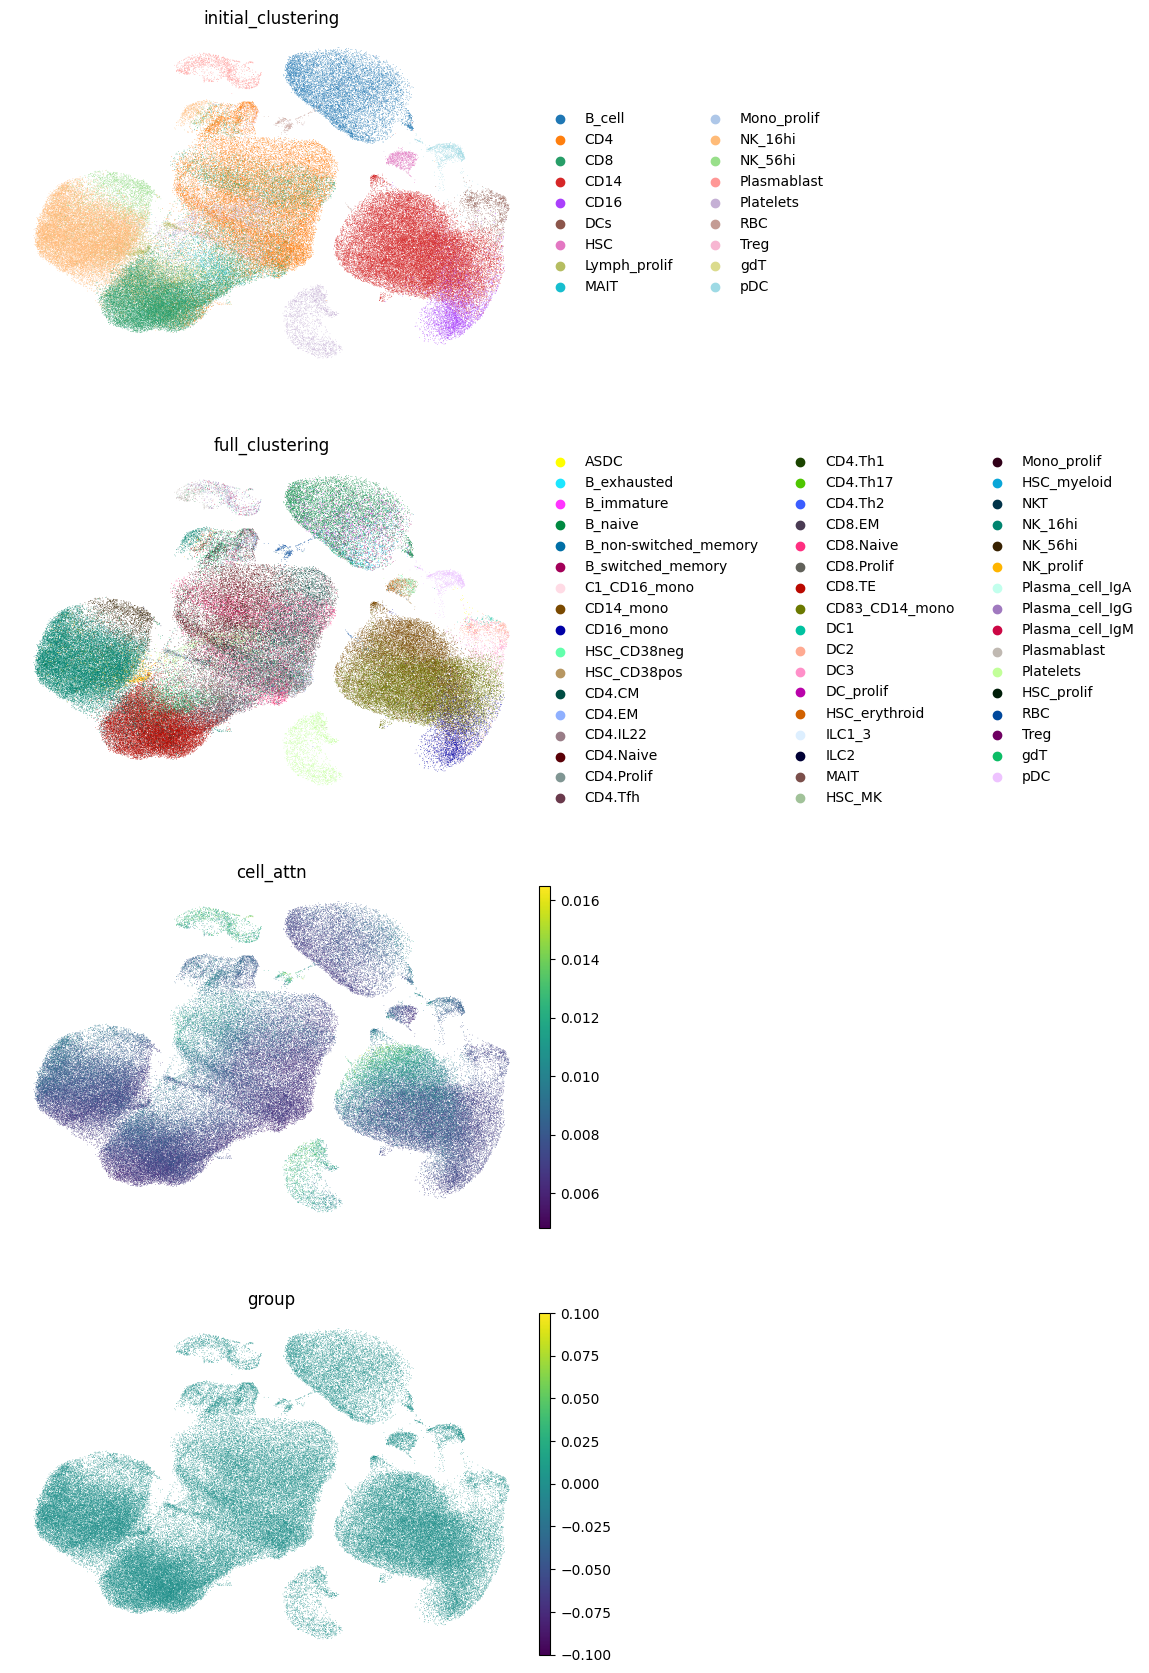

-------- Severe -------


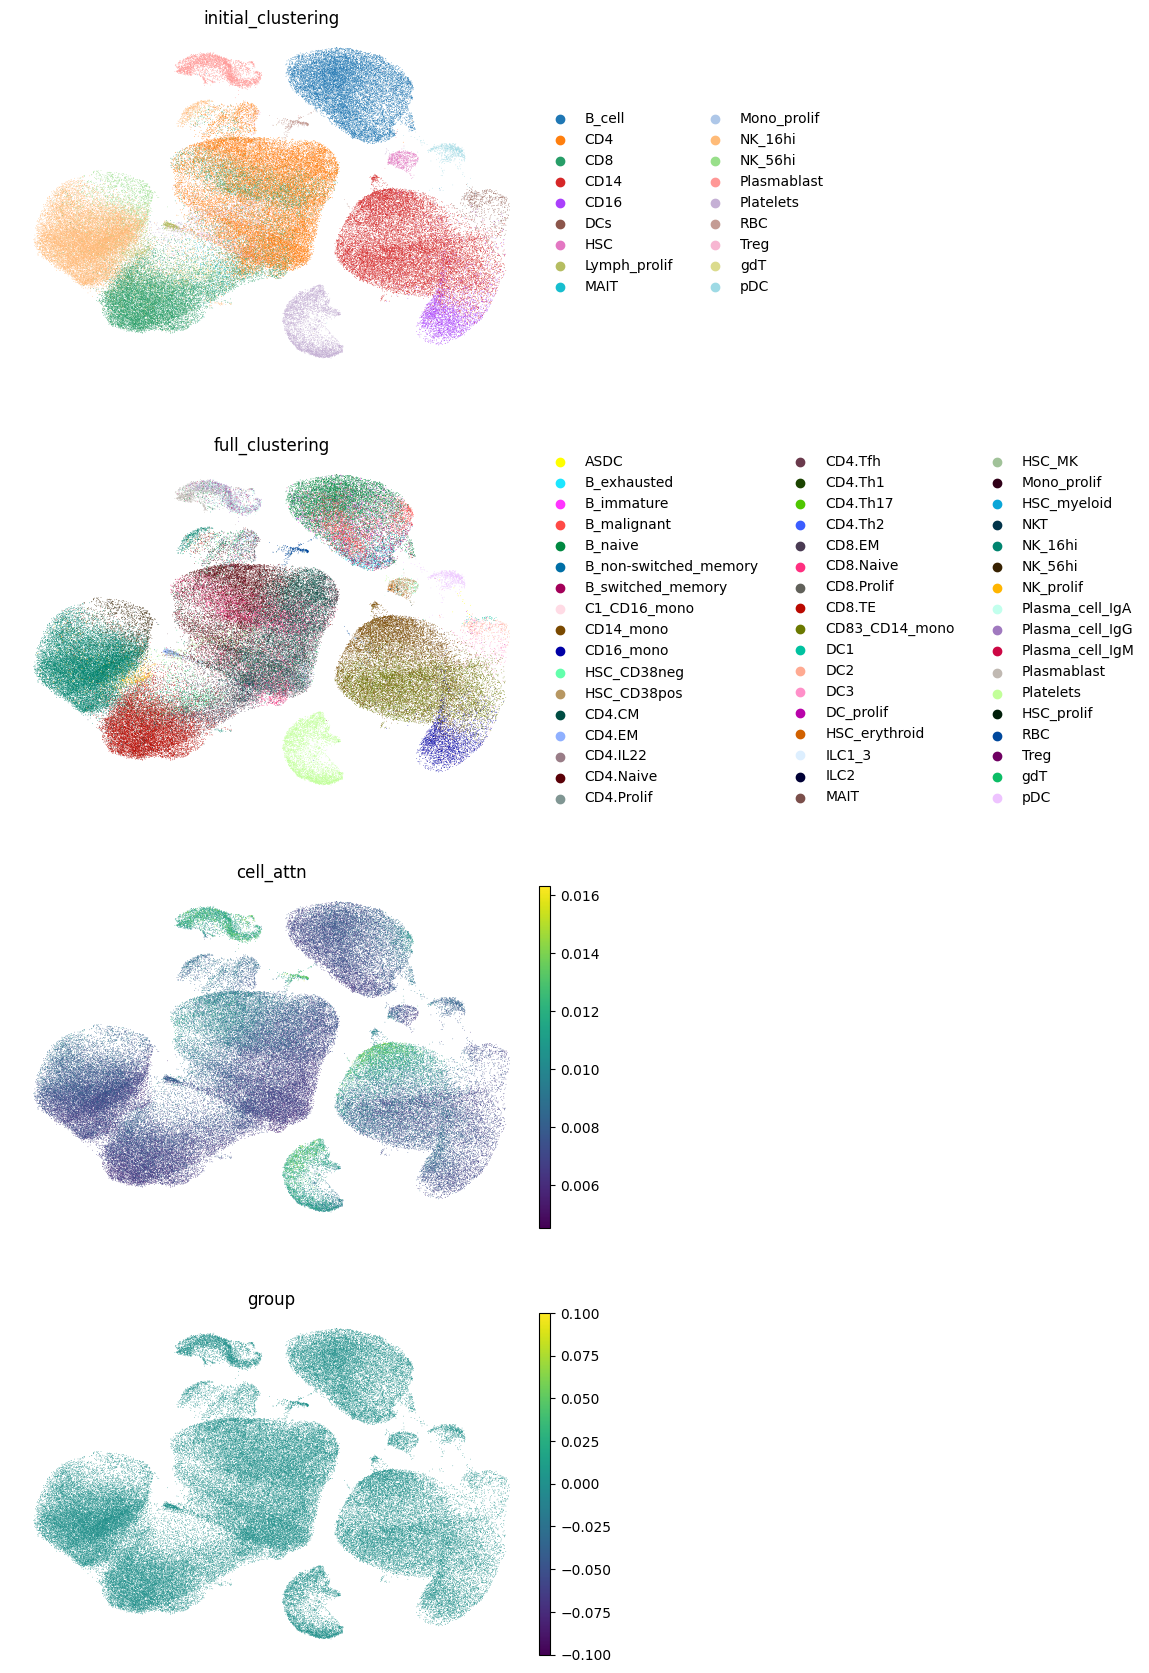

In [5]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    adata_tmp = adata[adata.obs['Status_on_day_collection_summary'] == cond].copy()
    print(f'-------- {cond} -------')
    sc.pl.umap(
        adata_tmp,
        color=['initial_clustering', 'full_clustering', 'cell_attn', 'group'],
        ncols=1,
        frameon=False
    )

In [6]:
dfs = []
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    adata_tmp = adata[adata.obs['Status_on_day_collection_summary'] == cond].copy()
    threshold_idx = int(len(adata_tmp) * 0.9)
    threshold_value = sorted(adata_tmp.obs['cell_attn'])[threshold_idx]
    adata_tmp.obs['group'] = 'all cells'
    adata_tmp.obs.loc[adata_tmp.obs['cell_attn'] >= threshold_value, 'group'] = 'top 10% cells'
    adata.obs[f'top_cells_{cond}'] = False
    adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}'] = True
    adata.obs[f'top_cells_{cond}'] = adata.obs[f'top_cells_{cond}'].astype('category')
    dfs.append(adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs[['initial_clustering', 'Status_on_day_collection_summary']])

In [7]:
adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, 'top_cells_Severe']

covid_index
AAACCTGAGTTACGGG-MH9143320    True
AAACCTGGTCACAAGG-MH9143320    True
AAACCTGTCAACACTG-MH9143320    True
AAACCTGTCCTAGGGC-MH9143320    True
AAACGGGAGGTGCTTT-MH9143320    True
                              ... 
BGCV15_GGGAGATTCATTGCGA-1     True
BGCV15_GTTCTCGGTACCCAAT-1     True
BGCV15_TAGACCAGTGGTAACG-1     True
BGCV15_TGCGGGTCAGGTGGAT-1     True
BGCV15_TTATGCTGTTAAGGGC-1     True
Name: top_cells_Severe, Length: 12328, dtype: category
Categories (2, bool): [False, True]

In [8]:
np.sum(adata.obs['top_cells_Severe'] == True)

12328

In [9]:
adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}']

covid_index
AAACCTGAGTTACGGG-MH9143320    True
AAACCTGGTCACAAGG-MH9143320    True
AAACCTGTCAACACTG-MH9143320    True
AAACCTGTCCTAGGGC-MH9143320    True
AAACGGGAGGTGCTTT-MH9143320    True
                              ... 
BGCV15_GGGAGATTCATTGCGA-1     True
BGCV15_GTTCTCGGTACCCAAT-1     True
BGCV15_TAGACCAGTGGTAACG-1     True
BGCV15_TGCGGGTCAGGTGGAT-1     True
BGCV15_TTATGCTGTTAAGGGC-1     True
Name: top_cells_Severe, Length: 12328, dtype: category
Categories (2, bool): [False, True]

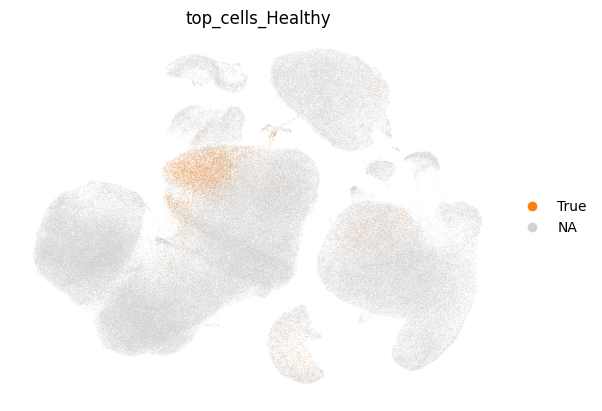

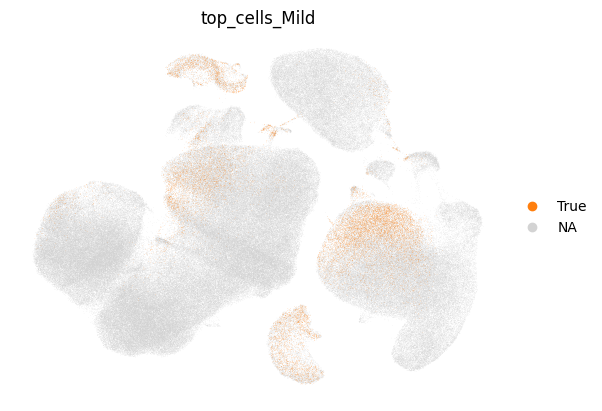

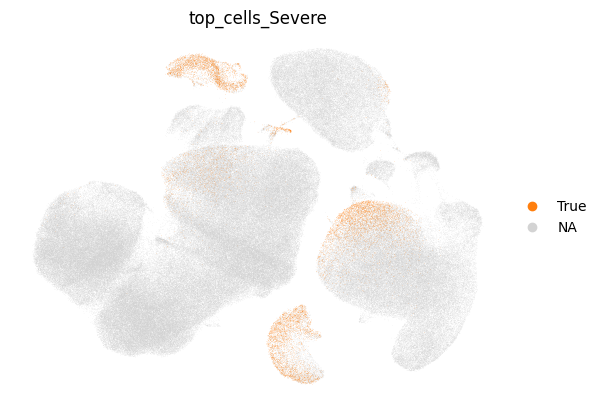

In [10]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    sc.pl.umap(adata, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [11]:
df = pd.concat(dfs)
df

initial_clustering  \
covid_index                                       
AAACCTGAGACCACGA-newcastle65                CD4   
AAACCTGTCACGAAGG-newcastle65                CD4   
AAACGGGAGATAGCAT-newcastle65               CD14   
AAACGGGAGCACAGGT-newcastle65               CD14   
AAACGGGGTTACAGAA-newcastle65                CD4   
...                                         ...   
BGCV15_GGGAGATTCATTGCGA-1                   CD4   
BGCV15_GTTCTCGGTACCCAAT-1           Plasmablast   
BGCV15_TAGACCAGTGGTAACG-1                   CD4   
BGCV15_TGCGGGTCAGGTGGAT-1                  CD14   
BGCV15_TTATGCTGTTAAGGGC-1                   CD4   

                             Status_on_day_collection_summary  
covid_index                                                    
AAACCTGAGACCACGA-newcastle65                          Healthy  
AAACCTGTCACGAAGG-newcastle65                          Healthy  
AAACGGGAGATAGCAT-newcastle65                          Healthy  
AAACGGGAGCACAGGT-newcastle65                          Healthy  
AAACGGGGTTACAGAA-newcastle65                          Healthy  
...                                                       ...  
BGCV15_GGGAGATTCATTGCGA-1                              Severe  
BGCV15_GTTCTCGGTACCCAAT-1                              Severe  
BGCV15_TAGACCAGTGGTAACG-1                              Severe  
BGCV15_TGCGGGTCAGGTGGAT-1                              Severe  
BGCV15_TTATGCTGTTAAGGGC-1                              Severe  

[36245 rows x 2 columns]

In [12]:
df_group = df.groupby('Status_on_day_collection_summary').value_counts(normalize=True).mul(100)
df_group

Status_on_day_collection_summary  initial_clustering
Healthy                           CD4                   47.792235
                                  CD8                   22.056314
                                  CD14                  12.553328
                                  Platelets              7.391212
                                  Treg                   2.602389
                                  RBC                    2.165102
                                  B_cell                 1.258532
                                  Plasmablast            1.002560
                                  NK_16hi                0.917235
                                  NK_56hi                0.586604
                                  MAIT                   0.554608
                                  pDC                    0.469283
                                  gdT                    0.394625
                                  DCs                    0.106655
                       

In [13]:
df_group = df_group.unstack().reindex(['Healthy', 'Mild', 'Severe'])

In [14]:
df_group

initial_clustering                  B_cell       CD14      CD16        CD4  \
Status_on_day_collection_summary                                             
Healthy                           1.258532  12.553328  0.085324  47.792235   
Mild                              1.031566  47.362630  0.522660  15.831098   
Severe                            1.135626  34.206684  0.219014   7.973718   

initial_clustering                      CD8       DCs       HSC  Lymph_prolif  \
Status_on_day_collection_summary                                                
Healthy                           22.056314  0.106655  0.053328      0.010666   
Mild                               5.185338  0.068771  0.165051      0.185682   
Severe                             2.157690  0.016223  0.056781      0.048670   

initial_clustering                    MAIT  Mono_prolif   NK_16hi   NK_56hi  \
Status_on_day_collection_summary                                              
Healthy                           0.554608          NaN  0.917235  0.586604   
Mild                              0.061894     0.116911  1.499209  0.412626   
Severe                                 NaN     0.389358  0.170344  0.040558   

initial_clustering                Plasmablast  Platelets       RBC      Treg  \
Status_on_day_collection_summary                                               
Healthy                              1.002560   7.391212  2.165102  2.602389   
Mild                                 9.958050  13.706072  2.310708  0.949041   
Severe                              24.269955  26.338417  2.474043  0.429916   

initial_clustering                     gdT       pDC  
Status_on_day_collection_summary                      
Healthy                           0.394625  0.469283  
Mild                              0.068771  0.563923  
Severe                                 NaN  0.073005

In [15]:
color = []
for ct in df_group.columns:
    idx = list(adata.obs['initial_clustering'].cat.categories).index(ct)
    color.append(adata.uns['initial_clustering_colors'][idx])
len(color)

18

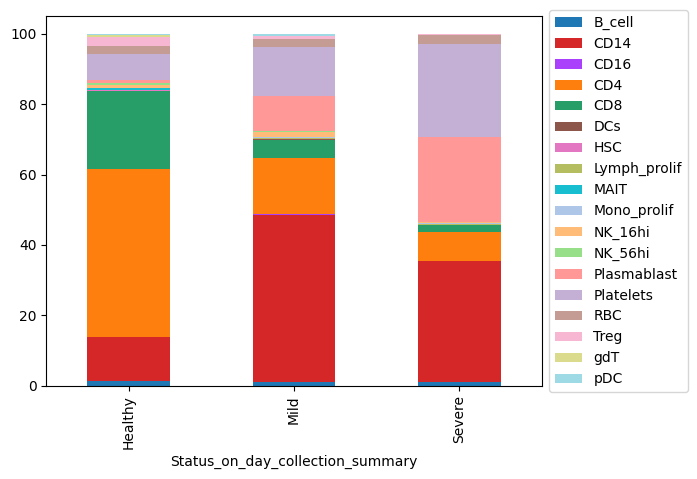

In [16]:
df_group.plot.bar(stacked=True, color=color).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [17]:
mono = adata[adata.obs['initial_clustering'] == 'CD14'].copy()
mono

AnnData object with n_obs × n_vars = 61064 × 16
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'Status_on_day_collection_summary_cont', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Healthy', 'top_cells_Mild', 'top_cells_Severe'
    uns: 'Status_on_day_collection_summary_colors', 'initial_clustering_colors', 'full_clustering_colors', 'top_cells_Healthy_colors', 'top_cells_Mild_colors', 'top_cells_Severe_colors'
    obsm: 'X_umap', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'

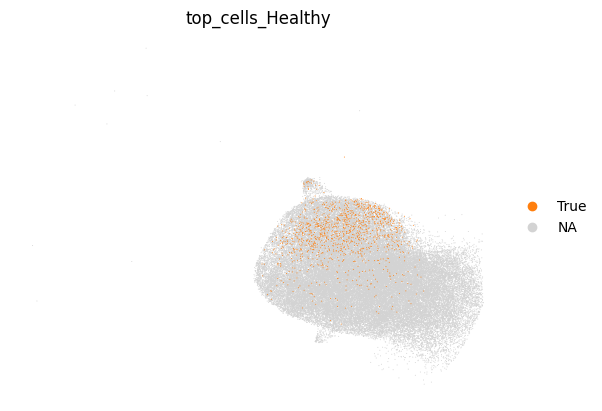

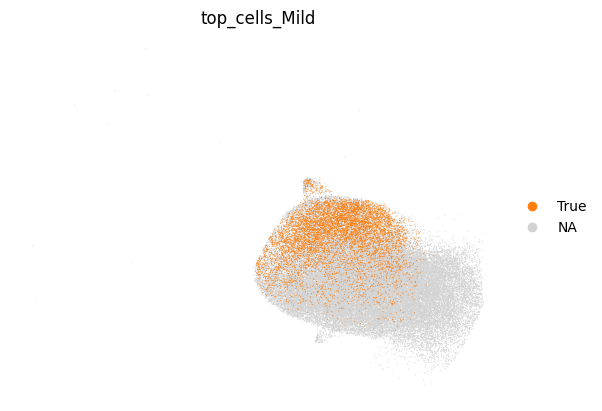

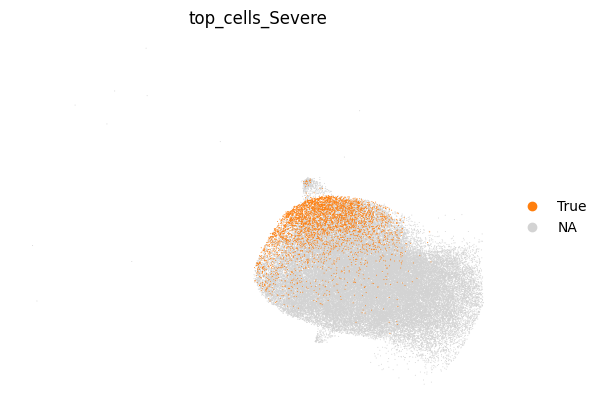

In [18]:
for cond in np.unique(mono.obs['Status_on_day_collection_summary']):
    sc.pl.umap(mono, color=[f'top_cells_{cond}'], groups=[True], frameon=False)